In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [4]:
class cyclic_interp_curve:
    '''
    Class for cyclic curve
    Methods:
        1) hermit_cubic_spline - makes up a spline function and counts the value of cubic spline in Hermit form in t
        2) draw - makes a scatter plot of initial set of dots and
           a curve that makes up from interpolate functions
    '''

    def __init__(self, x, y, der, step):
        self.x = x
        self.y = y
        self.step = step
        self.n = len(x)
        self.der = np.copy(der)  # vector of derivatives
        self.der = np.append(self.der, np.array(der[0]))


    def draw(self):
        plt.scatter(self.x, self.y, marker='o')
        vhcs = np.vectorize(self.hermit_cubic_spline)
        tmp = list()
        for i in range(0, self.n - 1):
            tmp.append(np.arange(self.x[i], self.x[i + 1] + self.step, self.step))
        for i in tmp:
            plt.plot(i, vhcs(i))
        plt.show()

    def hermit_cubic_spline(self, t): 
        i = np.argmax(self.x > t) - 1

        xa = self.x[i]
        xb = self.x[i + 1]
        ya = self.y[i]
        yb = self.y[i + 1]
        sa = self.der[i]
        sb = self.der[i + 1]
        h = xb - xa
        m = (yb - ya) / h
        p1 = yb * (t - xa) / h + ya * (xb - t) / h
        p2 = (t - xa) / h * (xb - t) / h
        p3 = (m - sb) * (t - xa) + (sa - m) * (xb - t)
        return p1 + p2 * p3


In [5]:
def cubic_spline_interpolation_first_derivatives(x,y):
    '''
    Function for making periodic spline interpolation based on dots (x,y)
    arguments:
    x,y - coordinates of given function
    returns:
    array of first derivatives in given dots (enough to build interp function)
    '''
    n = x.shape[0] - 2  # n + 2 dots given, splits into n + 1 intervals
    s = np.zeros(n+1)
    r = np.zeros(n+1)
    a = np.zeros(n)
    b = np.zeros(n+1)
    c = np.zeros(n)
    d = np.zeros(n+1)  # vector of constant terms
    for i in range(n + 1):
        s[i] = 1 / (x[i+1]-x[i])
        r[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
    for i in range(1,n):
        a[i-1] = s[i-1]
        b[i] = 2*(s[i-1] + s[i])
        c[i] = s[i]
        d[i] = 3*(s[i-1]*r[i-1] + s[i]*r[i])
    d[0] = s[n]*r[n] + s[0]*r[0]
    d[n] = s[n-1]*r[n-1] + s[n]*r[n]
    b[0] = 2*(s[n] + s[0])
    c[0] = s[0]
    a[n-1] = s[n-1]
    b[n] = 2*(s[n-1]+s[n])
    return Sherman_Morison_algorithm(a,b,c,d,s[n],s[n])


In [6]:
def Sherman_Morison_algorithm(aa, bb, cc, r, alpha, beta):
    '''
    variables:
    a,b,c - vectors of coefficients of tridiagonal matrix
    r - vector of constant terms
    alpha - element of matrix (1, n)
    beta- element of matrix (n, 1)
    returns:
    solution of linear system with tridiagonal matrix with corner coefficients alpha and beta
    '''
    a = np.copy(aa)
    b = np.copy(bb)
    c = np.copy(cc)
    n = b.shape[0]  # size
    u = np.zeros(n)
    v = np.zeros(n)
    u[0] = alpha
    u[-1] = beta
    v[0] = 1
    v[-1] = 1
    b[0] -= alpha
    b[-1] -= beta

    w = Thomas_algorithm(a, b, c, r)
    z = Thomas_algorithm(a, b, c, u)
    x = np.zeros(n)
    vw = v.dot(w)
    vz = v.dot(z)
    for i in range(n):
        x[i] = w[i] - z[i] * (vw) / (1 + vz)
    return x


In [7]:
def Thomas_algorithm(a,b,c,d):

    '''
    Implementation of Thomas algorithm.
  
    variables:
        a, b, c, d - lower tridiagonal, main, upper tridiagonal vectors of a matrix and free vector (dtype=float)
        ac, bc, cc, dc - copies of vectors a, b, c, d


    returns:
         х - solution vector

    '''

    ac, bc, cc, dc = np.copy(a), np.copy(b), np.copy(c), np.copy(d)
    n = len(b)

    # stage 1

    beta = bc[0]
    bc[0] = 1
    cc[0] = cc[0] / beta
    dc[0] = dc[0] / beta
    for i in range(1, n - 1):
        alpha = (bc[i] - cc[i - 1] * ac[i - 1])
        beta = ac[i - 1]
        ac[i - 1] -= ac[i - 1] * bc[i - 1]
        bc[i] = (bc[i] - cc[i - 1] * beta) / alpha
        cc[i] = cc[i] / alpha
        dc[i] = (dc[i] - dc[i - 1] * beta) / alpha

    i = n - 1
    alpha = (bc[i] - cc[i - 1] * ac[i - 1])
    beta = ac[i - 1]
    ac[i - 1] -= ac[i - 1] * bc[i - 1]
    bc[i] = (bc[i] - cc[i - 1] * beta) / alpha
    dc[i] = (dc[i] - dc[i - 1] * beta) / alpha

    # stage 2

    x = np.zeros([n, ])
    x[n - 1] += dc[n - 1]
    for i in range(n - 2, -1, -1):
        x[i] += dc[i] - cc[i] * x[i + 1]
    return x


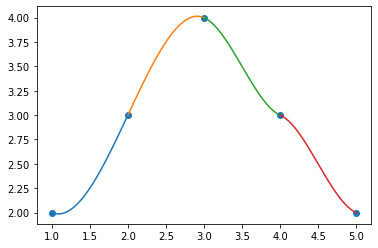

In [8]:
x=np.array([1,2,3,4,5])
y=np.array([2,3,4,3,2])
spline=cyclic_interp_curve(x,y,cubic_spline_interpolation_first_derivatives(x,y),0.01)
spline.draw()

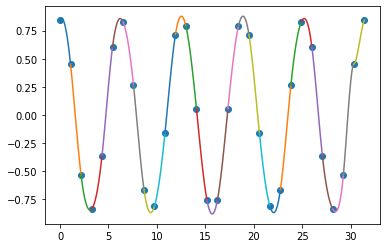

In [10]:
x = np.linspace(0, 10*pi, 30)
vsin = np.vectorize(lambda x: sin(cos(x)))
y=vsin(x)
spline=cyclic_interp_curve(x,y,cubic_spline_interpolation_first_derivatives(x,y),0.01)
spline.draw()